In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import shin_metiu_full as sf
import ipywidgets as widgets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from exact_simulator import simulation, prep_ham, prepare_state, inner
import warnings

warnings.filterwarnings("ignore")
sns.set_context(
    "paper",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

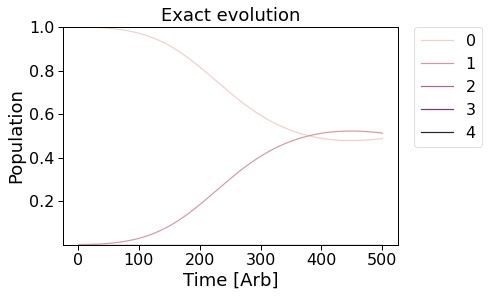

In [53]:
sim = simulation(
    .5,
    1000,
    r_f=5,
    r_l=4,
    r_r=3.2,
    resolution=16,
    L=19,
    x_0=-2,
    v_0=0.00114,
    vector = [0],
    padding=40,
    parameterized=False,
    obs_error = 1

)

# x_0=-2.013,
# v_0=0.0023,

sns.lineplot(
    data=sim.coef_df.query("state<16&value>1e-6"),
    x="time",
    y="value",
    hue="state",
).set( ylabel="Population", xlabel="Time [Arb]", title="Exact evolution", ylim=[1e-4,1])
# plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [1]:
sim2 = simulation(
    .5,
    1000,
    r_f=5,
    r_l=4,
    r_r=3.1,
    resolution=16,
    L=19,
    x_0=-2.262,
    v_0=0.00114,
    vector = [0],
    padding=5,
    parameterized=True,
)

# x_0=-2.013,
# v_0=0.0023,

sns.lineplot(
    data=sim2.coef_df.query("state<16&value>1e-5"),
    x="time",
    y="value",
    hue="state",
    style="state",
).set( ylabel="Population", xlabel="Time [Arb]", title="Exact evolution", ylim=[1e-4,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

NameError: name 'simulation' is not defined

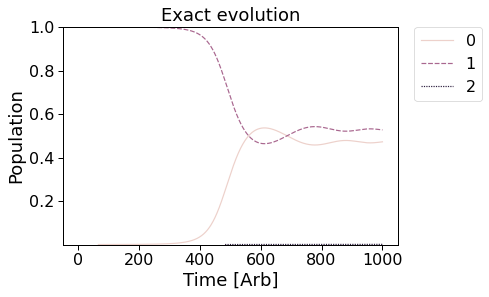

In [107]:
sns.lineplot(
    data=sim.coef_df.query("state<16&value>1e-5"),
    x="time",
    y="value",
    hue="state",
    style="state",
).set( ylabel="Population", xlabel="Time [Arb]", title="Exact evolution", ylim=[1e-4,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [109]:
print(sim.store_xs[3000],sim.store_v[3000], )


-2.2625076341009542 0.002186031087546787


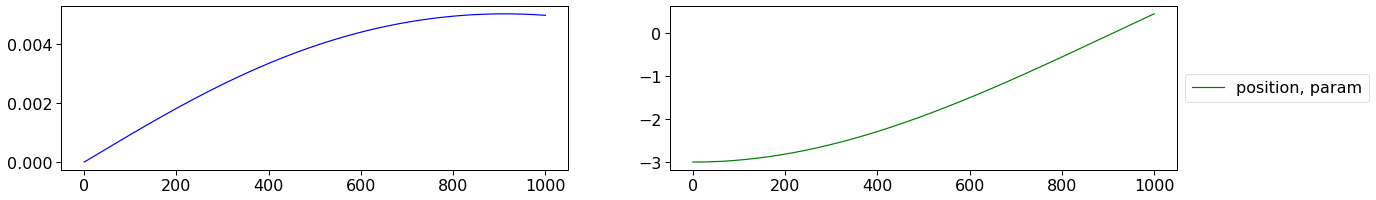

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))
o = 0
s,e=0+o,5000+o
# s,e=0,-1
axes[0].plot(
    sim2.store_t[s:e],
    sim2.store_v[s:e],  # / abs(sim.store_v).max(),
    color="blue",
    label="velocity, full",
)
axes[1].plot(
    sim2.store_t[s:e],
    sim2.store_xs[s:e],  # / abs(sim.store_xs).max(),
    color="green",
    label="position, param",
)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
plt.show()

In [ ]:
def plot_thing(r_f, r_l, r_r, L, res, padding):
    sim = simulation(1, 0, r_f, r_l, r_r, res, L, x_0=0, padding=padding)
    En_df = pd.DataFrame(
        sim.store_eigen_pos, columns=range(sim.resolution), index=range(len(sim.xgrid))
    )
    map_xs = {
        list(range(sim.resolution))[i]: sim.xgrid[i] for i in range(sim.resolution)
    }
    En_df = (
        En_df.rename_axis("position").reset_index().melt("position", var_name="Energy")
    )
    En_df["position"] = En_df["position"].map(map_xs)
    sns.lineplot(
        data=En_df.query("Energy<3"), x="position", y="value", hue="Energy"
    ).set(ylabel="Energy [Arb]", xlabel="Position [Arb]")
    plt.xlim(-sim.L / 3, sim.L / 3)
    plt.ylim(np.min(En_df["value"]), np.mean(En_df.query("value<0")["value"]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    print(sim.xgrid[0])
    plt.show()


rf = widgets.FloatSlider(value=5, min=0.05, max=15, step=0.05)
rr = widgets.FloatSlider(value=3.1, min=0.05, max=15, step=0.05)
rl = widgets.FloatSlider(value=4, min=0.05, max=15, step=0.05)
L = widgets.FloatSlider(value=19, min=1, max=40, step=0.5)

res = widgets.IntSlider(value=16, min=16, max=128, step=16)
pad = widgets.IntSlider(value=10, min=0, max=20, step=1)

widgets.interact(plot_thing, r_f=rf, r_l=rl, r_r=rr, L=L, res=res, padding=pad)

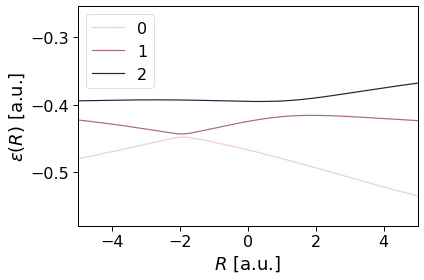

In [60]:
sim = simulation(
    .5,
    1,
    r_f=5,
    r_l=4,
    r_r=3.1,
    resolution=512,
    L=19,
    x_0=-2.1,
    v_0=0.00114,
    vector = [0],
    padding=40,
    parameterized=False,
)

En_df = pd.DataFrame(sim.store_eigen_pos, columns=range(sim.resolution), index=range(len(sim.xgrid)))
map_xs = {list(range(sim.resolution))[i]: sim.xgrid[i] for i in range(sim.resolution)}
En_df = En_df.rename_axis("position").reset_index().melt("position", var_name="Energy")
En_df["position"] = En_df["position"].map(map_xs)
sns.lineplot(data=En_df.query("Energy<3"), x="position", y="value", hue="Energy").set(
    ylabel=r"$\epsilon(R)$ [a.u.]", xlabel=r"$R$ [a.u.]")
# plt.ylim([-0.275,-0.17])
plt.xlim([-5, 5])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.legend()
plt.tight_layout()
plt.savefig("energy_levels.pdf")

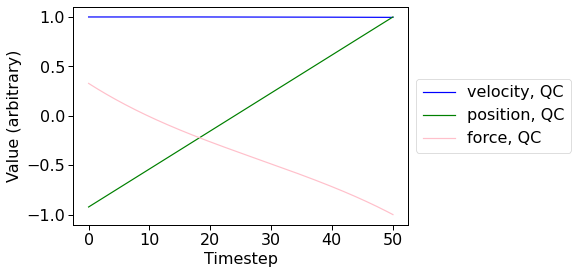

In [27]:
# plt.plot(store_energy/abs(store_energy).max(),color='red',label='energy')
import matplotlib

matplotlib.rcParams.update({"font.size": 16})
plt.plot(
    sim.store_t,
    sim.store_v / abs(sim.store_v).max(),
    color="blue",
    label="velocity, QC",
)
plt.plot(
    sim.store_t,
    sim.store_xs / abs(sim.store_xs).max(),
    color="green",
    label="position, QC",
)
plt.plot(
    sim.store_t, sim.store_f / abs(sim.store_f).max(), color="pink", label="force, QC"
)
# plt.plot(sim_sl.store_t,sim_sl.store_v/abs(sim.store_v).max(),color='blue',label='velocity, exact',linestyle='--')
# plt.plot(sim_sl.store_t,sim_sl.store_xs/5,color='green',label='position, exact',linestyle='--')
# plt.plot(sim_sl.store_t,sim_sl.store_f/abs(sim.store_f).max(),color='pink',label='force, exact',linestyle='--')
plt.xlabel("Timestep", fontsize=16)
plt.ylabel("Value (arbitrary)", fontsize=16)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("figure.svg")

[None]

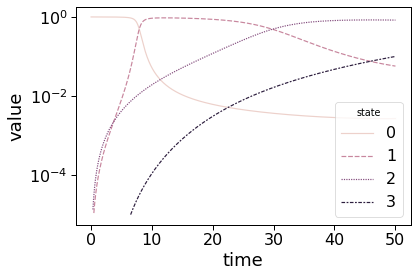

In [28]:
sns.lineplot(
    data=sim.coef_df.query(f"state<4&value>1e-5"),
    x="time",
    y="value",
    hue="state",
    style="state",
).set(yscale="log")

interactive(children=(IntSlider(value=0, description='n', max=1000), Output()), _dom_classes=('widget-interact…

<function __main__.plot_gauss(n=0)>

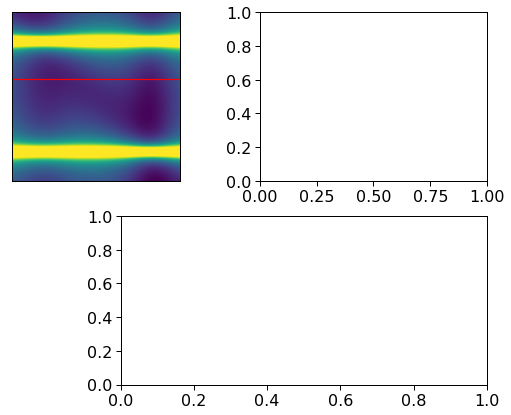

In [84]:
def plot_gauss(n=0):
    pot_plot = sf.ShinMetiu(
        nstates=500,
        L=sim.L,
        Rf=sim.r_f,
        Rl=sim.r_l,
        Rr=sim.r_r,
        mass=1836.0,
        m_el=1.0,
        nel=500,
    )
    mf = 16
    fig = plt.figure(figsize=(10, 8), constrained_layout=True)
    spec = fig.add_gridspec(3, 6)
    #     ax10 = fig.add_subplot(spec[1:4, :])
    ax0 = fig.add_subplot(spec[0, 2:4])
    ax1 = fig.add_subplot(spec[1, 1:4])
    ax2 = fig.add_subplot(spec[0, 0:2])

    ax = [ax0, ax1, ax2]
    r_n = sim.store_xs[n]
    psi = sim.store_psi[n]
    full, xgrid = prepare_state(sim.r_f, sim.r_l, sim.r_r, sim.resolution)
    En = sl.eigvalsh_tridiagonal(*full.H(np.array([r_n])))
    ax[2].imshow(
        np.clip(np.nan_to_num(pot_plot.vv(pot_plot.rr), nan=-1e11), -0.75, 0.75)
    )
    ax[2].hlines(((r_n + sim.L / 2) / sim.L) * 500, 0, 499, color="red")
    ax[2].axes.xaxis.set_visible(False)
    ax[2].axes.yaxis.set_visible(False)
    g = sns.lineplot(
        data=En_df.query("Energy<5&value<-0.1"),
        x="position",
        y="value",
        hue="Energy",
        ax=ax[0],
    )
    g.set(xlim=[-5, 0])
    ax[0].vlines(r_n, En_df["value"].min(), -0.1, color="red")
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    sns.lineplot(
        data=sim.coef_df.query(
            f"state<4&value>1e-5& time<{min([(n+100)*0.05, sim.steps*0.05])} & time > {max([(n-100)*0.05,0])}"
        ),
        x="time",
        y="value",
        hue="state",
        style="state",
        ax=ax[1],
    ).set(yscale="log")
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax[1].vlines(n * 0.05, 1e-5, 1)
    plt.tight_layout()
    # plt.savefig(f'./animation/{n}.png')
    plt.show()


# for n in range(1001):
#     plot_gauss(n)
widgets.interact(plot_gauss, n=(0, sim.steps, 1))

In [14]:
def plot_gauss(n=0, scale_psi=10, scale_pot=10):
    pot_plot = sf.ShinMetiu(
        nstates=500,
        L=sim.L,
        Rf=sim.r_f,
        Rl=sim.r_l,
        Rr=sim.r_r,
        mass=1836.0,
        m_el=1.0,
        nel=500,
    )
    mf = 16
    fig = plt.figure(figsize=(10, 8), constrained_layout=True)
    spec = fig.add_gridspec(3, 6)
    ax10 = fig.add_subplot(spec[1:4, :])
    ax0 = fig.add_subplot(spec[0, 2:4])
    ax1 = fig.add_subplot(spec[0, 4:7])
    ax2 = fig.add_subplot(spec[0, 0:2])

    ax = [ax0, ax10, ax1, ax2]
    r_n = sim.store_xs[n]
    psi = sim.store_psi[n]
    full, xgrid = prepare_state(sim.r_f, sim.r_l, sim.r_r, sim.resolution)
    En = sl.eigvalsh_tridiagonal(*full.H(np.array([r_n])))
    ax[3].imshow(
        np.clip(np.nan_to_num(pot_plot.vv(pot_plot.rr), nan=-1e11), -0.75, 0.75)
    )
    ax[3].hlines(((r_n + sim.L / 2) / sim.L) * 500, 0, 499, color="red")
    ax[3].axes.xaxis.set_visible(False)
    ax[3].axes.yaxis.set_visible(False)
    sns.lineplot(
        data=En_df.query("Energy<5&value<-0.1"),
        x="position",
        y="value",
        hue="Energy",
        ax=ax[0],
    )
    ax[0].vlines(r_n, En_df["value"].min(), -0.1, color="red")
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax[1].plot(xgrid, psi.real, color="orange", label=r"Re $\psi$")
    ax[1].plot(xgrid, psi.imag, color="blue", label=r"Im $\Psi$")
    ax[1].plot(xgrid, (np.abs(psi) ** 2) * scale_psi, color="red", label=r"$|\psi|$")
    # ax[1].plot(xgrid, scale_pot*(np.diag(full.vv(np.array([r_n])))-min(np.diag(full.vv(np.array([r_n])))))/(full.vv(np.array([r_n])).max()), color='green', label=r"$V/10$")
    ax[1].vlines(r_n, -0.4, 0.4, color="red")
    ax[1].set_ylabel("Arbitrary amplitude", fontsize=mf)
    #
    plt.subplots_adjust(hspace=0.0)
    ax[1].set_ylim((-1, 1))

    ax[1].set_title("", fontsize=mf)
    # ax.text(ho.grid[0],0.8,  r't = {:.1f} au'.format(tgrid[n]), fontsize=mf)

    ax[1].set_xlabel(r"x [a$_0$]", fontsize=mf)

    ax[1].legend(
        loc=3,
        shadow=False,
        fontsize=mf,
        frameon=False,
        borderpad=0.1,
        labelspacing=0,
        handlelength=0.8,
    )
    sns.lineplot(
        data=sim.coef_df.query(
            f"state<4&value>1e-5& time<{min([(n+100)*0.05, sim.steps*0.05])} & time > {max([(n-100)*0.05,0])}"
        ),
        x="time",
        y="value",
        hue="state",
        style="state",
        ax=ax[2],
    ).set(yscale="log")
    ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    ax[2].vlines(n * 0.05, 1e-5, 1)
    plt.tight_layout()
    # plt.savefig(f'./animation/{n}.png')
    plt.show()


# for n in range(1001):
#     plot_gauss(n)
widgets.interact(
    plot_gauss, n=(0, sim.steps, 1)
)  # , scale_psi=(1,10,0.1), scale_pot=(1,100,1))

interactive(children=(IntSlider(value=0, description='n'), IntSlider(value=10, description='scale_psi', max=30…

<function __main__.plot_gauss(n=0, scale_psi=10, scale_pot=10)>

In [ ]:
def eigstate(x, n, L):
    return np.sqrt(2 * (x[1] - x[0]) / L) * np.sin(np.pi * n * (x - L / 2) / L)


def energy(n, L, m):
    return n**2 * np.pi**2 / (2 * m * L**2)


def SHM(x, m):
    return 0.5 * m * 1000 * (x**2)


def hamiltonian(steps, L, m, V):
    dx = L / (steps + 1)
    L2 = L / 2 - dx
    xgrid = np.linspace(-L2, L2, steps)

    laplacian = (
        -2.0 * np.diag(np.ones(steps))
        + np.diag(np.ones(steps - 1), 1)
        + np.diag(np.ones(steps - 1), -1)
    ) / (float)(dx**2)
    return -0.5 * laplacian / m + V


# def solve(hamiltonian):
#     return sl.eigh_tridiagonal(np.diag(hamiltonian),np.diag(hamiltonian,1))


def solve(hamiltonian):
    return sl.eigh(hamiltonian)


# dynamically create figure
def plot_psi(n=1, r_nuc=0, r_f=1, r_l=1, r_r=1):
    full = sf.ShinMetiu(
        nstates=500,
        L=10.0,
        Rf=r_f,
        Rl=r_l,
        Rr=r_r,
        mass=1836.0,
        m_el=1.0,
        nel=500,
    )
    L = 10
    m = 1
    steps = 500
    dx = L / (steps + 1)
    L2 = L / 2 - dx
    xgrid = np.linspace(-L2, L2, steps)
    mf = 16
    # h= hamiltonian(steps,L,m,np.diag(full.V(np.array([r_nuc]))))
    eigenval, eigenvec = solve(full.V(np.array([r_nuc])))
    # we have eigenstates starting at n=1
    # but the numpy arrays start at index zero
    # so we just rename the n to n-1 in
    # order to get the correct vectors and energies
    nm1 = n - 1

    fig, ax = plt.subplots(3, figsize=(6, 3 * 3), sharex=True)

    # plot 1
    # Column-major order from Fortran leads to the unexpected indexing of the eigenvectors
    # we could also transpose the eigenvectors using transpose() or .T
    ax[0].plot(xgrid, eigenvec[:, nm1])
    ax[0].plot(xgrid, eigstate(xgrid, n, L), color="black", linestyle="--")
    ax[0].vlines(
        r_nuc,
        min(eigenvec[:, nm1]),
        max(eigenvec[:, nm1]),
        color="black",
        linestyle="--",
    )
    ax[0].set_ylabel("$\Psi$", fontsize=mf)
    ax[0].text(
        -L2, max(eigenvec[:, nm1] * 0.9), r"Wavefunction".format(nm1), fontsize=mf
    )

    # plot 2
    ax[1].plot(xgrid, eigenvec[:, nm1] ** 2)
    ax[1].vlines(
        r_nuc,
        min(eigenvec[:, nm1] ** 2),
        max(eigenvec[:, nm1] ** 2),
        color="black",
        linestyle="--",
    )
    ax[1].plot(xgrid, eigstate(xgrid, n, L) ** 2, color="black", linestyle="--")
    ax[1].set_ylabel("$|\Psi|^2$", fontsize=mf)
    ax[1].text(-L2, max(eigenvec[:, nm1] ** 2 * 0.9), "Density", fontsize=mf)

    # plot 3

    # ax[2].hlines(eigenval[nm1]-min(eigenval)+0.0001,-L2,L2)
    ax[2].plot(xgrid, np.diag(full.V(np.array([r_nuc]))))
    ax[2].vlines(
        r_nuc,
        min(np.diag(full.V(np.array([r_nuc])))),
        max(np.diag(full.V(np.array([r_nuc])))),
        color="black",
        linestyle="--",
    )
    # ax[2].hlines(energy(n,L,m),-L2,L2,color='black',linestyle = '--', label="exact")
    ax[2].set_xlabel("x (a.u.)", fontsize=mf)
    ax[2].set_ylabel("E (E$_h$)", fontsize=mf)
    # ax[2].text(-L2,0.1,eigenval[nm1],fontsize=mf)
    # ax[2].set_ylim(0.0001, eigenval[0:20].max())
    # ax[2].set_yscale('log')
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=mf)
        ax[i].yaxis.set_tick_params(labelsize=mf)
        ax[i].set_xlim(-L / 2, L / 2)
    # plt.subplots_adjust(hspace = 0.0)
    plt.show()


widgets.interact(
    plot_psi,
    n=(1, 20, 1),
    r_nuc=(-5, 5, 0.1),
    r_f=(-2, 5, 0.1),
    r_r=(-2, 5, 0.1),
    r_l=(-2, 5, 0.1),
)

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), FloatSlider(value=0.0, description='…

<function __main__.plot_psi(n=1, r_nuc=0, r_f=1, r_l=1, r_r=1)>

In [38]:
from scipy.interpolate import interp1d as interp
from scipy.special import erf

def choose_md_velocities(T=300,kB = 3.1668114e-6, mass =1836):
    """Return random choice of velocities from boltzmann distribution, defaults to 300K and atomic units"""
    def MB_CDF(v,m,T):
        """ Cumulative Distribution function of the Maxwell-Boltzmann speed distribution """
        a = np.sqrt(kB*T/m)
        return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)* v* np.exp(-v**2/(2*a**2))/a

    # create CDF
    vs = np.arange(0,100,0.001)
    cdf = MB_CDF(vs,mass,T) # essentially y = f(x)

    #create interpolation function to CDF
    inv_cdf = interp(cdf,vs) # essentially what we have done is made x = g(y) from y = f(x)

    def generate_velocities(n):
        """ generate a set of velocity vectors from the MB inverse CDF function """
        rand_nums = np.random.random(n)
        return inv_cdf(rand_nums)
    
    return generate_velocities(100000)
np.mean(choose_md_velocities(300))

0.001139251341960173

In [179]:
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)


In [174]:
results = []
# factors = [1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
factors = [0,1e-5,1e-4,1e-3,1e-2,1e-1,1]
factors_friendly = [1,'10%','20%','30%','40%','50%','60%','70%','80%','90%','100%','500%','1000%']
# factors = [1,2,3,4,5,6,-1,-2,-3,-4,-5,-6,0]


for i in factors:
    results.append(simulation(
        .5,
        1000,
        r_f=5,
        r_l=4,
        r_r=3.2,
        resolution=16,
        L=19,
        x_0=-2,
        v_0=0.00114,
        vector = [0],
        padding=40,
        parameterized=False,
        obs_error = i
    ))
    


In [175]:
def float_to_latex(f,precision=0,exp_digits=1):
    from numpy import format_float_scientific
    if isinstance(f, (list, tuple)):
        return ['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                for i in f]
    elif isinstance(f, np.ndarray):
        return np.array(['$' + format_float_scientific(i, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
                         for i in f])
    else:
        return '$' + format_float_scientific(f, precision=precision, exp_digits=exp_digits).replace('e', '\\cdot 10^{').replace('.','') + '}$'
float_to_latex(factors)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 


In [176]:

fidelities = []
for i in range(len(results)-1):
    fidelities.append([])
    for j in range(1000):
        fidelities[i].append(1-np.abs(np.dot(results[0].store_psi[j],np.conj(results[i+1].store_psi[j])))**2)
fidelities = np.array(fidelities).T


In [177]:
df = pd.DataFrame(data = fidelities[1:],columns=float_to_latex(factors[1:]))
df  = df.reset_index()
df  = df.rename(columns={'index':'Timestep'})
df = df.melt(id_vars='Timestep')
df  = df.rename(columns={'value':'Fidelity','variable':'Error factor'})


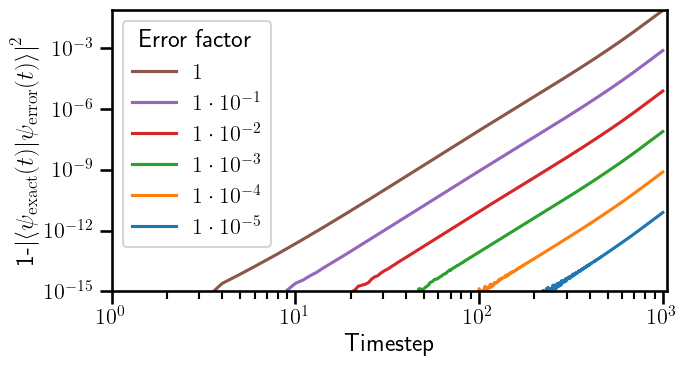

In [184]:
fig, ax = plt.subplots(figsize=((7, 4)))
sns.lineplot(data=df,x='Timestep',y='Fidelity',ci=None,hue='Error factor',ax=ax)
ax.set(ylabel=r'1-$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{error}(t)\rangle\right |^2 $',xlabel= r'Timestep',ylim=1e-15,xlim=1)
handles, labels = plt.gca().get_legend_handles_labels()
labels[-1]='$1$'
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles=handles, labels=labels, ncol=1,title='Error factor')
plt.tight_layout()
plt.yscale('log')
plt.xscale('log')
plt.savefig('additional_plots/force_error.pdf')

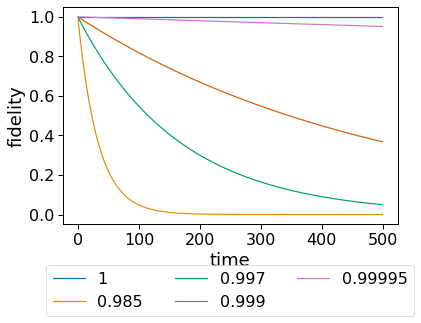

In [157]:
time = np.array(list(range(1000)))+1
fids = []
tresh = [1,0.985,0.997,0.999,0.99995]
for i in tresh:
    fids.append(i**time)
fids = np.array(fids).T
tresh = ['1','0.985','0.997','0.999','0.99995']
# tresh = ['$1$','$1-10^{-5}$','$1-10^{-4}$','$1-10^{-3}$','$1-10^{-2}$']
df = pd.DataFrame(data = fids,columns=tresh)
df  = df.reset_index()
df  = df.rename(columns={'index':'timestep'})
df = df.melt(id_vars='timestep')
df['time'] = 0.5*df['timestep']
df  = df.rename(columns={'value':'fidelity','variable':'treshhold'})
sns.lineplot(data=df,x='time',y='fidelity',ci=None,hue='treshhold',palette="colorblind")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


In [114]:
df

,timestep,treshhold,fidelity
0,0,1,1.000000
1,1,1,1.000000
2,2,1,1.000000
3,3,1,1.000000
4,4,1,1.000000
...,...,...,...
4995,995,1-10^-2,0.000045
4996,996,1-10^-2,0.000044
4997,997,1-10^-2,0.000044
4998,998,1-10^-2,0.000044
